# Number of events in Monte Carlo simulations for analysis of interference between radiocommunication systems


### Leandro Carísio Fernandes, Agostinho Linhares, Luciano Camilo Alexandre


Supplementary code to generate all tables and figures of the paper.

In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
import scipy.stats
import pandas as pd
import math
from scipy.stats import binom
from scipy.stats import norm

# To ensure reproducibility
np.random.seed(42)

# Configure font
def configure_font(useTex = True):
    plt.rcParams.update({
        "text.usetex": useTex,
        "font.family": "Helvetica",
        "text.latex.preamble": r'\usepackage{amsbsy, upgreek}'
    })
    plt.rc('axes', labelsize=16)
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

## Section: Monte Carlo  method

Since figure 1 is very simple, all elements were manually drawn:

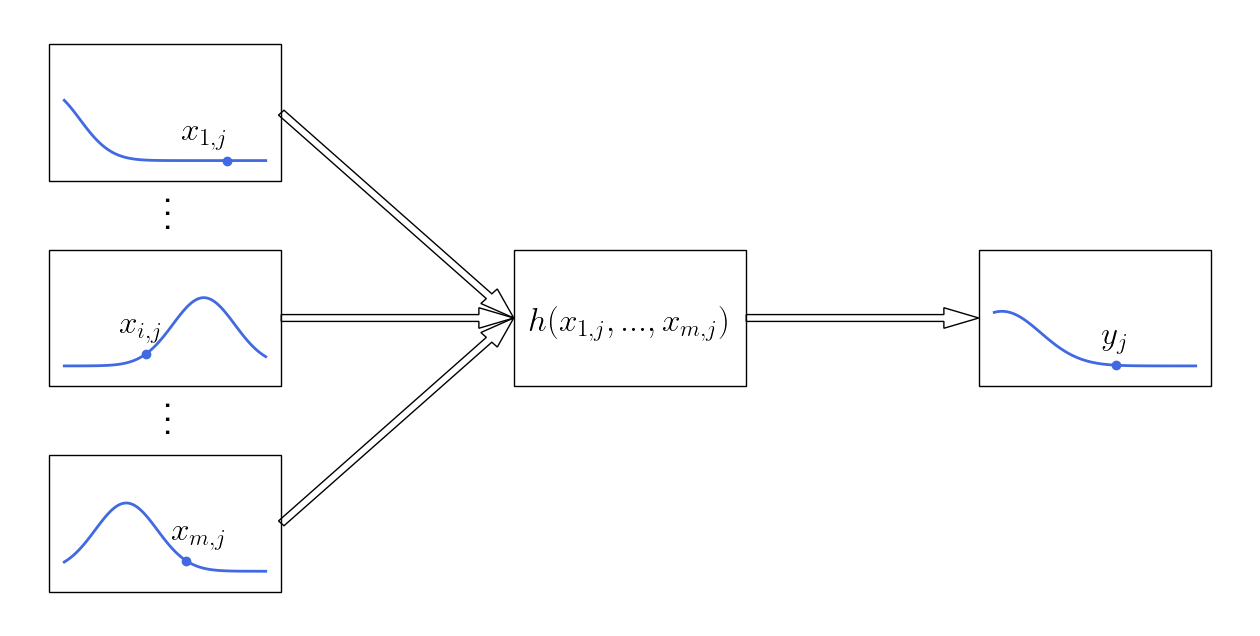

In [2]:
def plot_figure_1(hide_axis = False):
    configure_font(True)
    font_size = 24
    fig = plt.figure(figsize=(16, 8))
    # ax = plt.axes(xlim=(0, 170), ylim=(0, 100))
    ax = plt.axes(xlim=(5, 165), ylim=(5, 95))
    
    # Draw the inputs
    x = np.linspace(12, 38, 100)

    # Rectangle 1
    rect_x1 = patches.Rectangle((10, 70), 30, 20, linewidth=1, edgecolor='black', facecolor='none')
    ax.add_patch(rect_x1)
    # Arrow conecting the rectangle to the function box
    ax.arrow(40, 80, 30, -30, width=1, length_includes_head=True, edgecolor='black', facecolor='none')
    # Draw some y to represent a pdf and select some point to represent x[j]
    mean_1 = 10
    sigma_1 = 4
    y = (1/sigma_1/np.power(2*math.pi, 0.5)) * np.exp( -0.5 * np.power( (x - mean_1)/sigma_1, 2) )
    y = y * 100 + 73
    ax.plot(x, y, c='royalblue', lw=2)
    ax.plot(x[80], y[80], 'o-', c='royalblue', ms=6)
    ax.text(x[80] - 6, y[80] + 3, r'$x_{1,j}$', fontsize=font_size)
    
    # Three dots
    ax.text(25, 67, '.', fontsize=font_size)
    ax.text(25, 65, '.', fontsize=font_size)
    ax.text(25, 63, '.', fontsize=font_size)
    
    # Rectangle i
    rect_x2 = patches.Rectangle((10, 40), 30, 20, linewidth=1, edgecolor='black', facecolor='none')
    ax.add_patch(rect_x2)
    # Arrow conecting the rectangle to the function box
    ax.arrow(40, 50, 30, 0, width=1, length_includes_head=True, edgecolor='black', facecolor='none')
    # Draw some y to represent a pdf and select some point to represent x[j]
    mean_2 = 30
    sigma_2 = 4
    y = (1/sigma_2/np.power(2*math.pi, 0.5)) * np.exp( -0.5 * np.power( (x - mean_2)/sigma_2, 2) )
    y = y * 100 + 43
    ax.plot(x, y, c='royalblue', lw=2)
    ax.plot(x[40], y[40], 'o-', c='royalblue', ms=6)
    ax.text(x[42] - 4, y[40] + 3, r'$x_{i,j}$', fontsize=font_size)

    # Rectangle m
    rect_xm = patches.Rectangle((10, 10), 30, 20, linewidth=1, edgecolor='black', facecolor='none')
    ax.add_patch(rect_xm)
    # Arrow conecting the rectangle to the function box
    ax.arrow(40, 20, 30, 30, width=1, length_includes_head=True, edgecolor='black', facecolor='none')
    # Draw some y to represent a pdf and select some point to represent x[j]
    mean_m = 20
    sigma_m = 4
    y = (1/sigma_m/np.power(2*math.pi, 0.5)) * np.exp( -0.5 * np.power( (x - mean_m)/sigma_m, 2) )
    y = y * 100 + 13
    ax.plot(x, y, c='royalblue', lw=2)
    ax.plot(x[60], y[60], 'o-', c='royalblue', ms=6)
    ax.text(x[60] - 2, y[60] + 3, r'$x_{m,j}$', fontsize=font_size)
    
    # Three dots
    ax.text(25, 37, '.', fontsize=font_size)
    ax.text(25, 35, '.', fontsize=font_size)
    ax.text(25, 33, '.', fontsize=font_size)
    
    # Draw the rectangle to represent function h(.)
    rect_h = patches.Rectangle((70, 40), 30, 20, linewidth=1, edgecolor='black', facecolor='none')
    ax.add_patch(rect_h)
    ax.arrow(100, 50, 30, 0, width=1, length_includes_head=True, edgecolor='black', facecolor='none')
    ax.text(72, 48, r'$h(x_{1,j}, ..., x_{m,j})$', fontsize=font_size)

    # Draw the rectangle to represent the output
    rect_y = patches.Rectangle((130, 40), 30, 20, linewidth=1, edgecolor='black', facecolor='none')
    ax.add_patch(rect_y)
    x = np.linspace(132, 158, 100)
    mean_m = 133
    sigma_m = 5
    y = (1/sigma_m/np.power(2*math.pi, 0.5)) * np.exp( -0.5 * np.power( (x - mean_m)/sigma_m, 2) )
    y = y * 100 + 43
    ax.plot(x, y, c='royalblue', lw=2)
    ax.plot(x[60], y[60], 'o-', c='royalblue', ms=6)
    ax.text(x[60] - 2, y[60] + 3, r'$y_j$', fontsize=font_size)
    
    # Show
    if hide_axis:
        plt.axis('off')
    plt.savefig('./fig_monte_carlo_steps.png', dpi=600, bbox_inches='tight')
    plt.show()
    
plot_figure_1(True)

## Section: Confidence interval for quantiles - binomial

This plot ilustrate how to find the confidence interval for the 95% quantile a simulation with n = 1000.

Considering a binomial distribution with n = 1000 and p = 0.95, the maximum of the probability density function is at np = 950. But it is expected to find exactly 950 success only in 5.78% of the scenarios: binom.pmf(950, n, p) = 0.0577.

So, although the expected value is 950, its confidence interval with confidence level of (1 - alpha)% is the interval that covers 950 with a probability of at least (1 - alpha)%.

In this example, we can calculate the 95% confidence interval as [936, 966] (binom.ppf(0.025, n, p) and binom.ppf(0.975, n, p)). In other words, in at least 95% of the simulations, the true 95% quantile will be between the positions [936, 966]. Using the normal approximation and rounding up to the next integer, the confidence interval is [937, 967]:

 - norm.ppf(0.025, scale=(np(1-p))^0.5, loc=np) = 936.5
 - norm.ppf(0.975, scale=(np(1-p))^0.5, loc=np) = 963.5
 

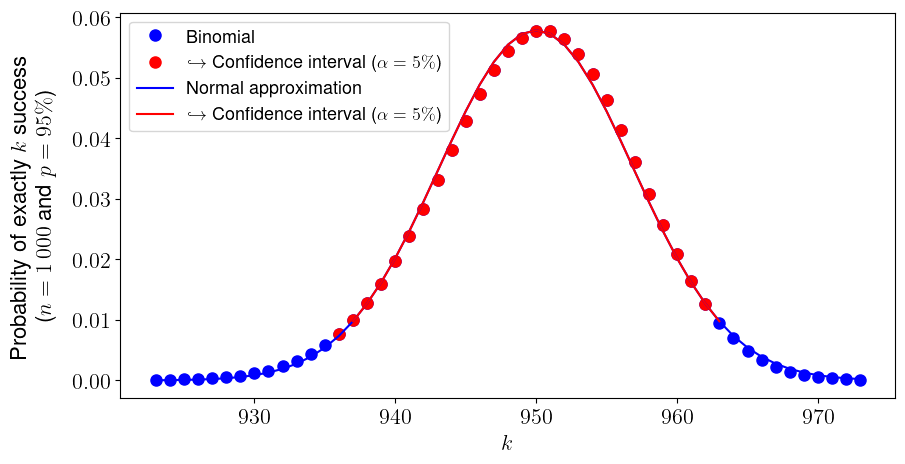

In [3]:
def plot_figure_2():
    configure_font(True)
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
    # Let's consider that we are interested in the 95% quantile of a simulation with n = 1000
    n, p = 1000, 0.95
    
    # Plot (blue) the pmf of the binomial distribution with parameters n and p
    x = np.arange(binom.ppf(0.0001, n, p), binom.ppf(0.9999, n, p))
    ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label="Binomial")
    #ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
    
    # Now, plot the same pmf of the binomial distribution with parameters n and p
    # but only at the confidence interval. Use red to distinguish from the previous plot
    x_ci = np.arange(binom.ppf(0.025, n, p), binom.ppf(0.975, n, p))
    ax.plot(x_ci, binom.pmf(x_ci, n, p), 'ro', ms=8, label=r"$\hookrightarrow$ Confidence interval ($\alpha = 5\%$)")
    #ax.vlines(x_ci, 0, binom.pmf(x_ci, n, p), colors='r', lw=3, alpha=0.3)
    
    # All the plots above were calculated using the binomial distribution
    # Now, let's approximate the binomial by a normal distribution
    mean = n*p
    std = (n*p*(1-p))**0.5
    ax.plot(x, norm.pdf(x, loc=mean, scale=std), 'b', label="Normal approximation")
    
    # The confidence interval according to the normal approximation
    x_ci_normal = np.arange(math.ceil(norm.ppf(0.025, loc=mean, scale=std)), math.ceil(norm.ppf(0.975, loc=mean, scale=std)))
    ax.plot(x_ci_normal, norm.pdf(x_ci_normal, loc=mean, scale=std), 'r', label=r"$\hookrightarrow$ Confidence interval ($\alpha = 5\%$)")
    
    # Axis and legend
    ax.set_xlabel('$k$')
    ax.set_ylabel('Probability of exactly $k$ success\n ($n = 1\,000$ and $p = 95\%$)', labelpad=12.0)
    ax.legend(loc='upper left', prop={'size': 13})
    
    plt.savefig('./fig_r_s_np.png', dpi=600, bbox_inches='tight')
    plt.show()
    
plot_figure_2()

## Section: Confidence intervals for quantiles - boostrap

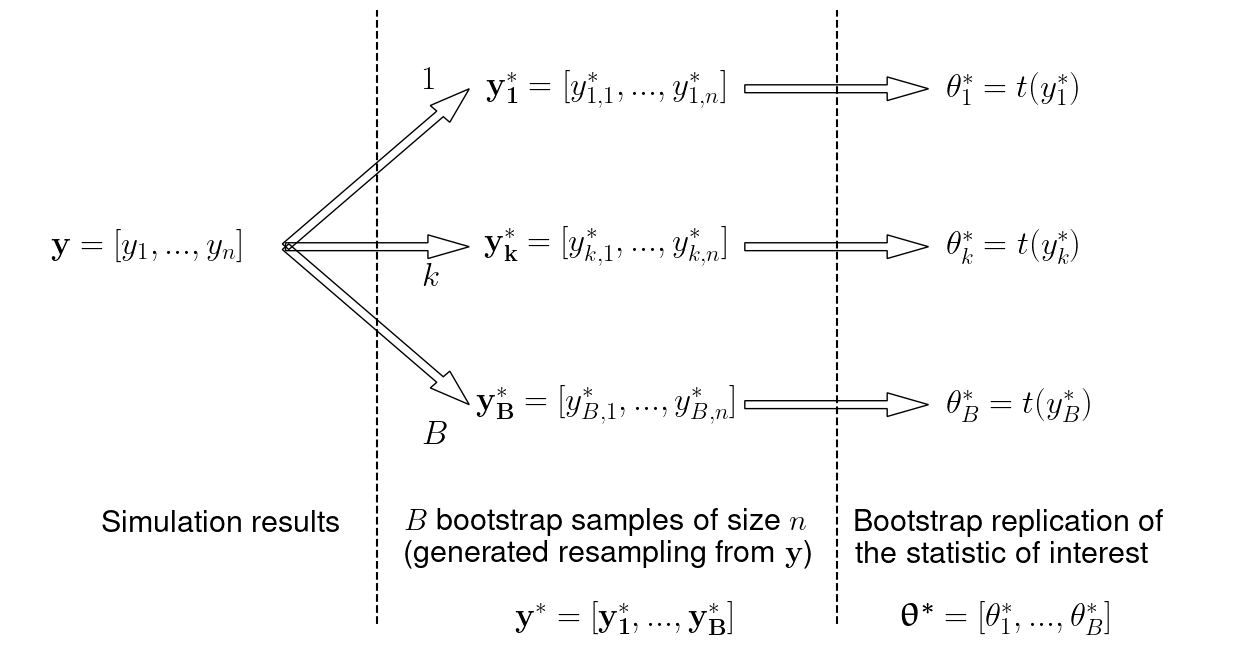

In [4]:
font_size = 24

def add_rect(ax, text, pos, w, h):
    rect = patches.Rectangle(pos, w, h, linewidth=0, edgecolor='black', facecolor='none')
    rx, ry = rect.get_xy()
    cx = rx + rect.get_width()/2.0
    cy = ry + rect.get_height()/2.0
    ax.add_artist(rect)
    ax.annotate(text, (cx, cy), color='black', fontsize=font_size, ha='center', va='center')  
    
def plot_figure_3(hide_axis = False):
    configure_font(True)
    fig = plt.figure(figsize=(16, 8))
    #ax = plt.axes(xlim=(0, 170), ylim=(0, 100))
    ax = plt.axes(xlim=(0, 135), ylim=(7, 85))
    
    # Result of the simulation
    add_rect(ax, '$\mathbf{y} = [y_1, ..., y_n]$', (5, 50), 20, 10)
    ax.arrow(30, 55, 20, 20, width=1, length_includes_head=True, edgecolor='black', facecolor='none')
    ax.text(45, 75, '$1$', fontsize=font_size)
    ax.arrow(30, 55, 20, 0, width=1, length_includes_head=True, edgecolor='black', facecolor='none')
    ax.text(45, 50, '$k$', fontsize=font_size)
    ax.arrow(30, 55, 20, -20, width=1, length_includes_head=True, edgecolor='black', facecolor='none')
    ax.text(45, 30, '$B$', fontsize=font_size)
    ax.plot([40, 40], [0, 100], linestyle='dashed', c='black')
    ax.text(10, 19, 'Simulation results', fontsize=font_size-2)    
    
    # B bootstrap samples (each one of size n)
    add_rect(ax, '$\mathbf{y^{*}_{1}} = [y^{*}_{1,1}, ..., y^{*}_{1,n}]$', (50, 70), 30, 10)
    add_rect(ax, '$\mathbf{y^{*}_{k}} = [y^{*}_{k,1}, ..., y^{*}_{k,n}]$', (50, 50), 30, 10)
    add_rect(ax, '$\mathbf{y^{*}_{B}} = [y^{*}_{B,1}, ..., y^{*}_{B,n}]$', (50, 30), 30, 10)
    ax.arrow(80, 75, 20, 0, width=1, length_includes_head=True, edgecolor='black', facecolor='none')
    ax.arrow(80, 55, 20, 0, width=1, length_includes_head=True, edgecolor='black', facecolor='none')
    ax.arrow(80, 35, 20, 0, width=1, length_includes_head=True, edgecolor='black', facecolor='none')
    ax.plot([90, 90], [0, 100], linestyle='dashed', c='black')
    ax.text(43, 15, '$B$ bootstrap samples of size $n$\n(generated resampling from $\mathbf{y}$)', fontsize=font_size-2)
    ax.text(55, 7, '$\mathbf{y^{*}} = [\mathbf{y^{*}_{1}}, ..., \mathbf{y^{*}_{B}}]$', fontsize=font_size)
    
    # Replication of the statistic of interest
    ax.text(102, 74, r"$\theta^{*}_{1} = t(y^{*}_{1})$" , fontsize=font_size)
    ax.text(102, 54, r"$\theta^{*}_{k} = t(y^{*}_{k})$" , fontsize=font_size)
    ax.text(102, 34, r"$\theta^{*}_{B} = t(y^{*}_{B})$" , fontsize=font_size)
    ax.text(92, 15, 'Bootstrap replication of\nthe statistic of interest', fontsize=font_size-2)
    ax.text(97, 7, r'$\boldsymbol{\uptheta^{*}} = [\theta^{*}_{1}, ..., \theta^{*}_{B}]$', fontsize=font_size)
    
    # Show
    if hide_axis:
        plt.axis('off')
    plt.savefig('./fig_bootstrap_principle.png', dpi=600, bbox_inches='tight')
    
    plt.show()
    
plot_figure_3(True)

## Section: Minimum number of events (n) to estimate a quantile of the result

This section shows two tables. The first one is the minumum number of events to estimate the upper boundary of the confidence interval as y[s] = y[n-1]:

In [5]:
def n_min(p, alpha, a=1):
    z = scipy.stats.norm.ppf(1 - alpha/2)
    #n1 = (1/(1-p)) * ( (z*p**0.5 - (p*z*z + 4*a)**0.5)/2 )**2
    n2 = (1/(1-p)) * ( (z*p**0.5 + (p*z*z + 4*a)**0.5)/2 )**2
    #n_min = np.ceil(np.max([n1, n2]))
    n_min = np.ceil(n2)
    
    if (n_min * p <= 5):
        n_min = np.ceil(5/p)
    return n_min
    
def table_n_min(a):
    quantiles = np.array([0.95, 0.99, 0.999, 0.9998, 0.9999, 0.99995, 0.99999])
    conf_level = np.array([0.95, 0.99, 0.999])
    
    df = pd.DataFrame(columns=['Quantile'])
    df.Quantile = quantiles
    
    for cl in conf_level:
        result = np.array([])
        for q in quantiles:
            result = np.append(result, n_min(q, (1-cl), a))
        df[f'{cl}%'] = result
    
    print(f'Table for a = {a}')
    print(df)

table_n_min(a = 0)
table_n_min(a = 1)

Table for a = 0
   Quantile     0.95%     0.99%     0.999%
0   0.95000      73.0     127.0      206.0
1   0.99000     381.0     657.0     1072.0
2   0.99900    3838.0    6629.0    10817.0
3   0.99980   19204.0   33168.0    54128.0
4   0.99990   38411.0   66343.0   108265.0
5   0.99995   76826.0  132692.0   216541.0
6   0.99999  384143.0  663484.0  1082746.0
Table for a = 1
   Quantile     0.95%     0.99%     0.999%
0   0.95000     110.0     164.0      245.0
1   0.99000     563.0     846.0     1265.0
2   0.99900    5661.0    8511.0    12739.0
3   0.99980   28321.0   42581.0    63735.0
4   0.99990   56646.0   85169.0   127481.0
5   0.99995  113295.0  170344.0   254972.0
6   0.99999  566490.0  851743.0  1274903.0


The second table is just the n_min rounded up:

In [6]:
n_min(1-0.001/100, 0.05, 0)

384143.0

In [7]:
print(n_min(0.9892, 0.001, 0), '->', '1000')
print(n_min(0.9946, 0.001, 0), '->', '2000')
print(n_min(0.9978, 0.001, 0), '->', '5000')
print(n_min(0.9989, 0.001, 0), '->', '10000')
print(n_min(0.9994, 0.001, 0), '->', '20000')
print(n_min(0.9997, 0.001, 0), '->', '50000')

992.0 -> 1000
1995.0 -> 2000
4911.0 -> 5000
9833.0 -> 10000
18036.0 -> 20000
36082.0 -> 50000


## Section: Discussion

Functions to calculate the confidence interval using the normal approximation and the percentile boostrap:

In [8]:
# Use bootstrap to find a confidence interval for the p-quantile
def ci_quantile_bootstrap(sample, B, p, alpha):
    bootstraped_value = np.zeros(B)
    n = sample.size
      
    # Use a for-loop
    for i in range(0, B):
        # Resample
        resampled = np.random.choice(sample, size=sample.shape, replace=True)
        # Apply the p quantile function
        bootstraped_value[i] = np.quantile(resampled, p)
    
    # The for-loop above could be replaced by these two lines, but the for-loop runs faster:
    #resampled = np.random.choice(sample, size=(B, n), replace=True)
    #bootstraped_value = np.quantile(resampled, p, axis=1)
    
    # Return the bootstrap array, the expected vallue of the parameter of
    # interest, the confidence interval and the standard error
    return [bootstraped_value,
            np.mean(bootstraped_value), 
            np.quantile(bootstraped_value, [alpha/2, 1-alpha/2]),
            np.std(bootstraped_value)]


# Calculate the confidence interval for quantiles based on the
# normal approximation to the binomial distribution
# Based on the book Practical nonparametric statistics
def ci_quantile_napp_to_binom(sample, p, alpha):
    x = np.sort(sample)
    n = len(sample)
    r, s = r_s_napp_to_binom(n, p, alpha)
    
    # Calculate the confidence interval
    # It is necessary to subtract 1 because the arrays are 0-index based
    m_r = x[r-1] if r <= n else float('NaN')
    m_s = x[s-1] if s <= n else float('NaN')
    
    return m_r, m_s

def r_s_napp_to_binom(n, p, alpha):
    z = scipy.stats.norm.ppf(1 - alpha/2)
    r = np.ceil(n*p - z*(n*p*(1-p))**0.5)
    s = np.ceil(n*p + z*(n*p*(1-p))**0.5)
    return int(r), int(s)

Auxiliary method to calculate the quantile and the confidence interval for more than one n:

In [9]:
# Calculate the quantile and its confidence interval for several values of n
# If n_i < len(sample), this method considers only the first n_i elements of
# the sample data
def ci_quantile_for_several_n(sample, n, p, alpha):
    df = pd.DataFrame(columns=['n', 'sample_quantile', 'inf_normal', 'sup_normal', 'inf_boot', 'sup_boot'])
    sample_quantile = np.array([])
    inf_normal = np.array([])
    sup_normal = np.array([])
    inf_boot = np.array([])
    sup_boot = np.array([])
    
    for n_i in n:
        print(f'Calculating CI for sample size: {n_i}')
        sample_n_i = sample[0:n_i]
        # Calculate the confidence interval using the normal approximation
        # to the binomial distribution
        m_r, m_s = ci_quantile_napp_to_binom(sample_n_i, p, alpha)
        # Calculate the confidence interval using percentile bootstrap
        _, _, boot_ci, _ = ci_quantile_bootstrap(sample_n_i, 2000, p, alpha)
        
        sample_quantile = np.append(sample_quantile, np.quantile(sample_n_i, p))
        inf_normal = np.append(inf_normal, m_r)
        sup_normal = np.append(sup_normal, m_s)
        inf_boot = np.append(inf_boot, boot_ci[0])
        sup_boot = np.append(sup_boot, boot_ci[1])
    
    df.n = n
    df.sample_quantile = sample_quantile
    df.inf_normal = inf_normal
    df.sup_normal = sup_normal
    df.inf_boot = inf_boot
    df.sup_boot = sup_boot
    
    return df

Auxiliary methods to plot cdfs, quantiles, protection criteria, etc:

In [10]:
def plot_quantiles_ic(df, title, protection_criteria, legend_loc='upper right', bbox_to_anchor=None, xlim=None, ylim=None, fig_name=None, y_label=r'$I/N$ (dB)', x_cut=None):
    n = df.n
    sample_quantile = df.sample_quantile
    inf_normal = df.inf_normal
    sup_normal = df.sup_normal
    inf_boot = df.inf_boot
    sup_boot = df.sup_boot
    protection_criteria = protection_criteria*np.ones([len(n),])
    
    xmin = 0
    xmax = n.max()
    ymin = min(inf_normal.min(), inf_boot.min())
    ymax = max(sup_normal.max(), sup_boot.max())
    
    fig = plt.figure(figsize=(8,6))
    if (xlim is None):
        xlim=(xmin, xmax)
    if (ylim is None):
        ylim=(ymin, ymax)
    ax = plt.axes(xlim=xlim, ylim=ylim)
    
    ax.set_xlabel('$n$')
    ax.set_ylabel(y_label, labelpad=12.0)
    
    ax.plot(n, sample_quantile, 'o-', ms=6, markevery=1, c='royalblue', label=r'$p$-sample quantile ($\xi_p$)')
    ax.plot(n, inf_normal, c='coral', label='Confidence interval (normal approximation)')
    ax.plot(n, sup_normal, c='coral')
    
    ax.plot(n, inf_boot, c='mediumseagreen', label='Confidence interval (bootstrap)')
    ax.plot(n, sup_boot, c='mediumseagreen')
    
    ax.plot(n, protection_criteria, linestyle='dashed', c='red', label='Protection criteria')
    ax.plot()

    if x_cut is not None:
        ax.plot([x_cut, x_cut], ylim, linestyle='dashed', c='gray', label=fr'$n = {x_cut}$')
        
    ax.legend(loc=legend_loc, bbox_to_anchor=bbox_to_anchor, prop={'size': 13})
    if (fig_name is not None):
        plt.savefig(fig_name, dpi=600, bbox_inches='tight')
    plt.show()
    
def plot_cdf(sample, protection_criteria, p, label_p, xlim, ylim=(0, 100), zoom_window = None, x_zoom = None, y_zoom = None, n_samples=None, fig_name=None, legend_loc='upper left', x_label=r'$I/N: X $(dB)'):
    fig = plt.figure(figsize=(8,6))
    ax = plt.axes(xlim=xlim, ylim=ylim)
    
    colors = ['royalblue', 'coral', 'mediumseagreen']
    if (n_samples is None):
        n_samples = [len(sample)]
        
    if (zoom_window is not None):
        ax_zoom = ax.inset_axes(zoom_window)
        ax_zoom.set_xlim(x_zoom[0], x_zoom[1])
        ax_zoom.set_ylim(y_zoom[0], y_zoom[1])
        #ax_zoom.set_xticks([])
        #ax_zoom.set_yticks([])
        ax.indicate_inset_zoom(ax_zoom)
    
    for idx, n in enumerate(n_samples):
        ordered_sample = np.sort(sample[0:n])
        x = np.linspace(1, n, n)
        cdf = 100.*x/n
    
        ax.plot(ordered_sample, cdf, c=colors[idx], label=f'$n = {n}$')
        if (zoom_window is not None):
            ax_zoom.plot(ordered_sample, cdf, c=colors[idx])
        
    ax.plot([protection_criteria, protection_criteria], [0, 100], linestyle='dashed', c='red', label='Protection criteria')
    ax.plot([xlim[0], xlim[1]], [p, p], linestyle='dashed', c='gray', label=label_p)
    
    if (zoom_window is not None):
        ax_zoom.plot([protection_criteria, protection_criteria], [0, 100], linestyle='dashed', c='red')
        ax_zoom.plot([x_zoom[0], x_zoom[1]], [p, p], linestyle='dashed', c='gray')
        
    ax.set_xlabel(x_label)
    ax.set_ylabel('Cumulative distribution function (\%)\n$F(x) = Prob(x < X)$', labelpad=5.0)

    ax.legend(loc=legend_loc, prop={'size': 13})
    if (fig_name is not None):
        plt.savefig(fig_name, dpi=600, bbox_inches='tight')
    plt.show()

## Section: Discussion - LTE and TVRO

Compute the interference at the 95% quantile. Considers a confidence interval of 99.9%

In [11]:
sample_saturation_lte_tvro = np.loadtxt('saturation - scenario UMa - R150m - eirp 46dBm - G-10dBi - fig 5c.txt')
sample_saturation_lte_tvro = sample_saturation_lte_tvro[:,1]

start = 1000
end = len(sample_saturation_lte_tvro)
num = int(len(sample_saturation_lte_tvro)/1000)
n = np.append([206], np.linspace(start, end, num)).astype(int)

result_lte_tvro = ci_quantile_for_several_n(sample_saturation_lte_tvro, n, 0.95, 0.001)
print(result_lte_tvro)

Calculating CI for sample size: 206
Calculating CI for sample size: 1000
Calculating CI for sample size: 2000
Calculating CI for sample size: 3000
Calculating CI for sample size: 4000
Calculating CI for sample size: 5000
Calculating CI for sample size: 6000
Calculating CI for sample size: 7000
Calculating CI for sample size: 8000
Calculating CI for sample size: 9000
Calculating CI for sample size: 10000
Calculating CI for sample size: 11000
Calculating CI for sample size: 12000
Calculating CI for sample size: 13000
Calculating CI for sample size: 14000
Calculating CI for sample size: 15000
Calculating CI for sample size: 16000
Calculating CI for sample size: 17000
Calculating CI for sample size: 18000
Calculating CI for sample size: 19000
Calculating CI for sample size: 20000
        n  sample_quantile  inf_normal  sup_normal   inf_boot   sup_boot
0     206       -51.125368  -52.383985  -46.565575 -52.896932 -49.007652
1    1000       -50.446747  -51.781159  -49.414920 -51.865478 -49.6

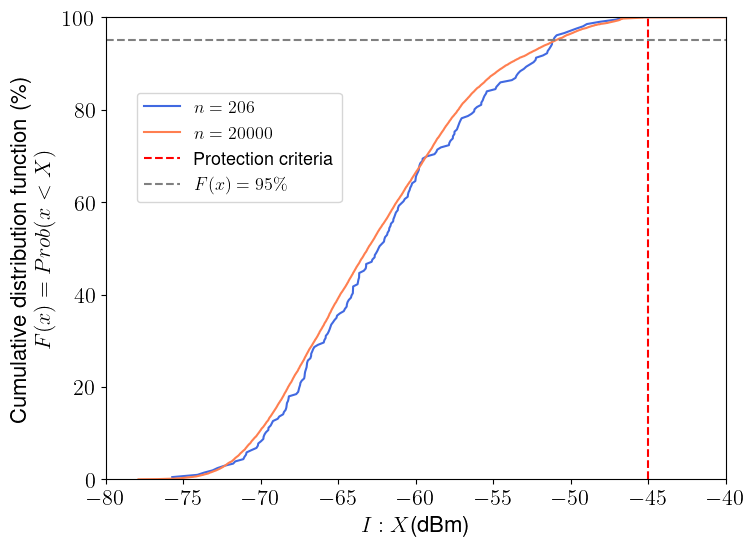

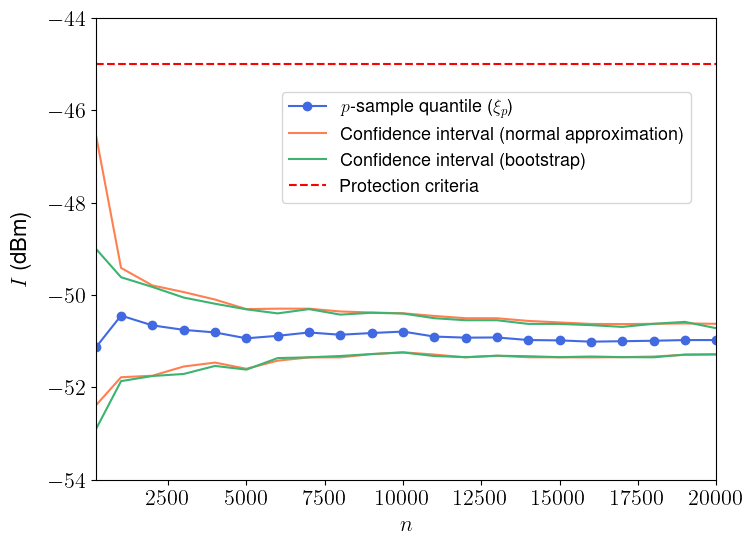

In [12]:
plot_cdf(sample_saturation_lte_tvro, -45, p=95, label_p=f'$F(x) = 95\%$', legend_loc=(0.05, 0.6), xlim=(-80, -40), ylim=(0, 100), n_samples=[206, 20000], fig_name='fig_cdf_lte_tvro.png', x_label=r'$I: X $(dBm)')

plot_quantiles_ic(result_lte_tvro, 'LTE vs TVRO', -45, fig_name='fig_quantile_lte_tvro.png', legend_loc=(0.3, 0.6), xlim=(206, 20000), ylim=(-54, -44), y_label=r'$I$ (dBm)')

## Section: Discussion - HIBS and AMS

Compute the I/N at the 99.9% quantile. Considers a confidence interval of 95%.

In [13]:
sample_inr_hibs_ams = np.loadtxt('INR - contrib 10 - fig A2.5.2.12.txt')
sample_inr_hibs_ams = sample_inr_hibs_ams[:,1]

start = 1000
end = len(sample_inr_hibs_ams)
num = int((end - start)/1000) + 1
n = np.linspace(start, end, num).astype(int)

result_hibs_ams = ci_quantile_for_several_n(sample_inr_hibs_ams, n, 0.99, 0.01)

print(result_hibs_ams)

Calculating CI for sample size: 1000
Calculating CI for sample size: 2000
Calculating CI for sample size: 3000
Calculating CI for sample size: 4000
Calculating CI for sample size: 5000
Calculating CI for sample size: 6000
Calculating CI for sample size: 7000
Calculating CI for sample size: 8000
Calculating CI for sample size: 9000
Calculating CI for sample size: 10000
Calculating CI for sample size: 11000
Calculating CI for sample size: 12000
Calculating CI for sample size: 13000
Calculating CI for sample size: 14000
Calculating CI for sample size: 15000
Calculating CI for sample size: 16000
Calculating CI for sample size: 17000
Calculating CI for sample size: 18000
Calculating CI for sample size: 19000
Calculating CI for sample size: 20000
Calculating CI for sample size: 21000
Calculating CI for sample size: 22000
Calculating CI for sample size: 23000
Calculating CI for sample size: 24000
Calculating CI for sample size: 25000
Calculating CI for sample size: 26000
Calculating CI for sa

Let's check the reduction factor for the confidence interval for the normal approximation when n increases from 1000 to 2000:

In [14]:
result_hibs_ams_n_1000_2000 = result_hibs_ams[result_hibs_ams.n.isin([1000, 2000])]
print(result_hibs_ams_n_1000_2000[['n', 'sample_quantile', 'inf_normal', 'sup_normal']])

ci_length_1000 = (result_hibs_ams.sup_normal[result_hibs_ams.n == 1000] - result_hibs_ams.inf_normal[result_hibs_ams.n == 1000]).iloc[0]
ci_length_2000 = (result_hibs_ams.sup_normal[result_hibs_ams.n == 2000] - result_hibs_ams.inf_normal[result_hibs_ams.n == 2000]).iloc[0]

reduction = ci_length_2000/ci_length_1000

print(f'CI length (n = 1000): {ci_length_1000}')
print(f'CI length (n = 2000): {ci_length_2000}')
print(f'Reduction factor: {reduction}')

      n  sample_quantile  inf_normal  sup_normal
0  1000        -7.489469   -11.45242    -0.79671
1  2000       -10.151966   -13.23000    -6.27416
CI length (n = 1000): 10.65571
CI length (n = 2000): 6.95584
Reduction factor: 0.6527805279986036


Let's check the reduction factor for the confidence interval for the bootstrap when n increases from 5000 to 30000:

In [15]:
result_hibs_ams_n_5000_30000 = result_hibs_ams[result_hibs_ams.n.isin([5000, 30000])]
print(result_hibs_ams_n_5000_30000[['n', 'sample_quantile', 'inf_boot', 'sup_boot']])

ci_length_5000 = (result_hibs_ams.sup_boot[result_hibs_ams.n == 5000] - result_hibs_ams.inf_boot[result_hibs_ams.n == 5000]).iloc[0]
ci_length_30000 = (result_hibs_ams.sup_boot[result_hibs_ams.n == 30000] - result_hibs_ams.inf_boot[result_hibs_ams.n == 30000]).iloc[0]

reduction = ci_length_30000/ci_length_5000

print(f'CI length (n = 5000): {ci_length_5000}')
print(f'CI length (n = 30000): {ci_length_30000}')
print(f'Reduction factor: {reduction}')

        n  sample_quantile   inf_boot  sup_boot
4    5000        -9.711001 -11.452420 -7.722226
29  30000        -9.538038 -10.130912 -8.523557
CI length (n = 5000): 3.7301940250000003
CI length (n = 30000): 1.607355261999798
Reduction factor: 0.4309039291863103


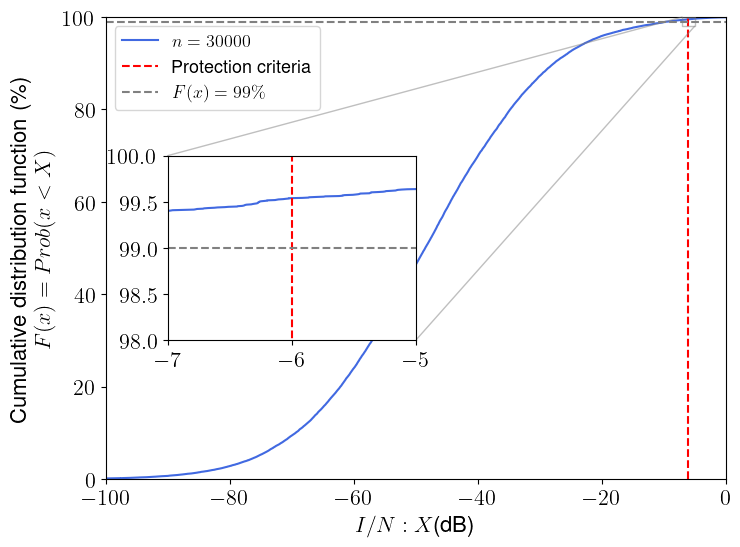

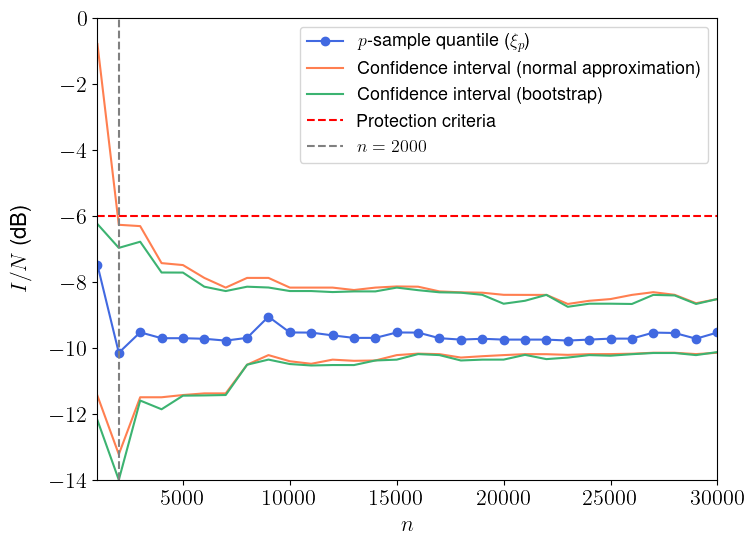

In [16]:
plot_cdf(sample_inr_hibs_ams, -6, p=99, label_p=f'$F(x) = 99\%$', xlim=(-100, 0), ylim=(0, 100), zoom_window=[0.1, 0.3, 0.4, 0.4], x_zoom=(-7, -5), y_zoom=(98, 100), n_samples=[30000], fig_name='fig_cdf_hibs_ams.png')
plot_quantiles_ic(result_hibs_ams, 'HIBS vs BT', -6, xlim=(1000, 30000), ylim=(-14, 0), fig_name='fig_quantile_hibs_ams.png', x_cut=2000)

## Section: Discussion - HIBS and Broadcast

Compute the INR at the 95% quantile. Considers a confidence interval of 99%

In [17]:
sample_inr_hibs_bt = np.loadtxt('INR - contrib 4 - fig A1.4.1.9.txt')
sample_inr_hibs_bt = sample_inr_hibs_bt[:,1]

start = 1000
end = len(sample_inr_hibs_bt)
num = int(len(sample_inr_hibs_bt)/1000)
n = np.append([127], np.linspace(start, end, num)).astype(int)

result_hibs_bt = ci_quantile_for_several_n(sample_inr_hibs_bt, n, 0.95, 0.01)
print(result_hibs_bt)

Calculating CI for sample size: 127
Calculating CI for sample size: 1000
Calculating CI for sample size: 2000
Calculating CI for sample size: 3000
Calculating CI for sample size: 4000
Calculating CI for sample size: 5000
Calculating CI for sample size: 6000
Calculating CI for sample size: 7000
Calculating CI for sample size: 8000
Calculating CI for sample size: 9000
Calculating CI for sample size: 10000
Calculating CI for sample size: 11000
Calculating CI for sample size: 12000
Calculating CI for sample size: 13000
Calculating CI for sample size: 14000
Calculating CI for sample size: 15000
Calculating CI for sample size: 16000
Calculating CI for sample size: 17000
Calculating CI for sample size: 18000
Calculating CI for sample size: 19000
Calculating CI for sample size: 20000
Calculating CI for sample size: 21000
Calculating CI for sample size: 22000
Calculating CI for sample size: 23000
Calculating CI for sample size: 24000
Calculating CI for sample size: 25000
Calculating CI for samp

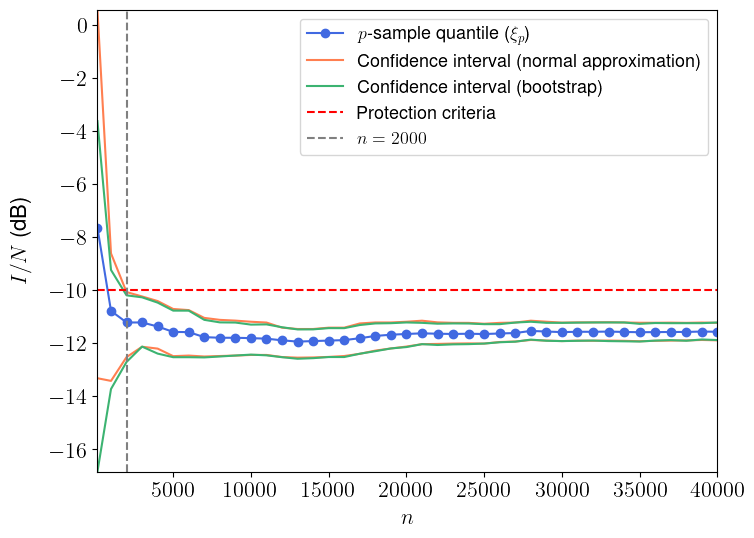

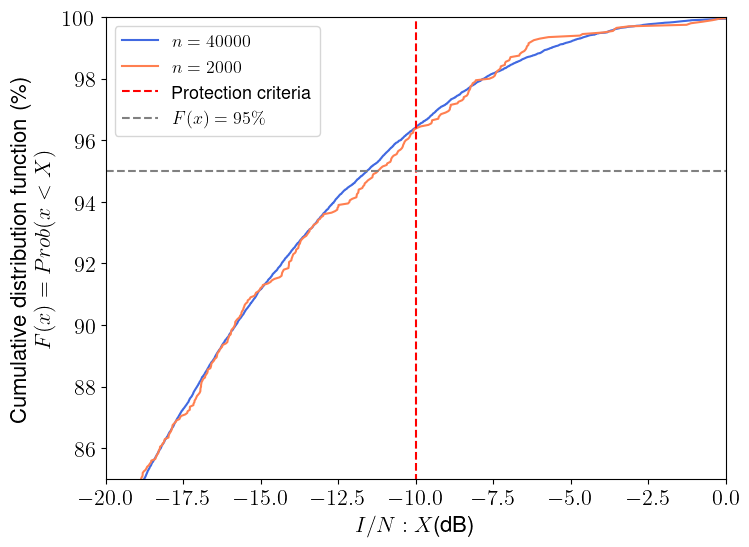

In [18]:
plot_quantiles_ic(result_hibs_bt, 'HIBS vs BT', -10, xlim=(127, 40000), fig_name='fig_quantile_hibs_dttb.png', x_cut=2000)

#plot_cdf(sample_inr_hibs_bt, -10, p=95, xlim=(-60, 0), zoom_window=[0.05, 0.3, 0.4, 0.4], x_zoom=(-12, -8), y_zoom=(93, 97), n_samples=[40000, 2000], fig_name='fig_cdf_hibs_dttb.png')

plot_cdf(sample_inr_hibs_bt, -10, p=95, label_p=f'$F(x) = 95\%$', xlim=(-20, 0), ylim=(85, 100), n_samples=[40000, 2000], fig_name='fig_cdf_hibs_dttb.png')